# Week 15 Scratch Paper and Notes

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

sns.set_context('talk')

In [2]:
sales_predictions ="https://docs.google.com/spreadsheets/d/e/2PACX-1vSsu3nnH_Ppm4Ao9XUqVlUZPfTx8bGv5gNbfSavqMhPhIWp4NwaEZk3W8FgDEhEJbg12sRU_FG5EBAb/pub?output=csv"
url = 'https://docs.google.com/spreadsheets/d/1VMaw2oCn0ABitd-alLAEsEhGS1Je2UFNLu76TKrIH7w/gviz/tq?tqx=out:csv&sheet=Raw_Medical_Data_for_day1'
height_data = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv'
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
diets_url = "https://docs.google.com/spreadsheets/d/1DW-2yHUm0YhH01r_kNp9ir5CaAlo9s48dhpIx-6J-TM/gviz/tq?tqx=out:csv&sheet=Diets"

#Distribution 


## Probability Distribution
Distribution shows what values occur and how frequently.
- Discrete distributions: can only take certain values like years, number of children, shoe size, etc.
- continuous distributions: can take nearly infinite number of values such as sales, or human height/weight.

Test Types:
- Parametric Tests: Data must follow a normal distribution. Easier to interpret and considered 'more powerful'.
- Non-Parametric Tests


### Probability Mass Function (PMF)
Discrete bars showing the values in a histogram converted to percent

- Positive Skew: Values grouped to the left. Tail to the Right
- Negative Skew: Values grouped to the right. Tail to the left

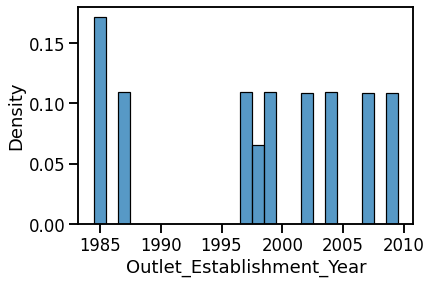

In [3]:
df = pd.read_csv(sales_predictions)

# Use histograms to see distribution/probability
sns.histplot(data=df, x='Outlet_Establishment_Year', discrete=True, stat='density');

# Using stat = 'density' changes it to a percentage that will add up to 1 (equivalent to %100)
## this is called a PMF or Probability Mass Function

### Kernal Density Estimates (KDE)
Smoothed/curved line showing the discrete probability mass to a continuous probability density.

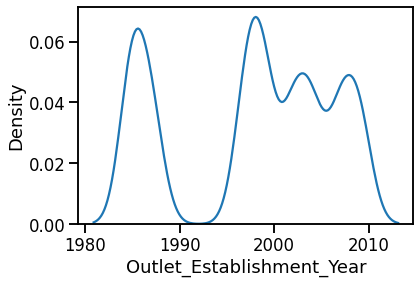

In [4]:
# KDE alone
sns.kdeplot(data = df, x= "Outlet_Establishment_Year");

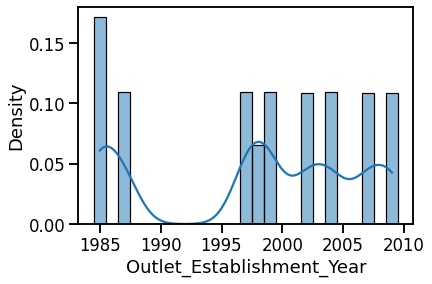

In [5]:
#KDE superimposed on top of the PMF using kde = True
sns.histplot(data=df, x='Outlet_Establishment_Year', discrete=True, 
             stat='density', kde = True);

Probability Mass Functions tell us the probability of a randomly selected data point falling into that bin. HOWEVER this only works with data we currently have.

KDE works to predict FUTURE data.

## Measures of Central Tendency
The typical value or center of the data.

Typically measured by mean, median or mode.
- Mean: The arithmetic Average found by dividing the sum of all the data by the total number. Most commonly used in the general public. Easily influenced by outliers.
- Median: The middle-most value in a sorted list. Less influenced by outliers.
- Mode: Value which occurs most frequently.

Mean is generally considered the best centrality measure but there are some situations where you should use/consider median or mode instead:
- Median is preferred when there are a few extreme outliers or if there is a long tailed distribution.
- Mode is preferred when the data is measured in nominal or ordinal scales.

## Measures of Dispersion
A measure of dispersion is a single value that attempts to describe how far apart the values are compared to the center of the data.


### Variance and Standard Deviation
- Variance (Denoted as Sigma Squared): sum of the squared difference between values and the mean, divided by the total number of values. Resulting measure is in different units than the central measure and data points (because its been squared).
- Standard Deviation (Denoted as Sigma): The square root value of variance.

In [6]:
## to calculate the standard deviation of a column in our dataset
# df['Column_name'].std()

The greater the standard deviation the 'wider' the distribution.
likewise smaller standard deviations will result in 'narrow' distributions.

Values within 1 standard deviation are considered common, values beyond 1 standard deviation are considered less common. Values outside 3 standard deviatiosn from the mean are considered outliers.


In [7]:
## Define these functions 
# mean = df['Column_name'].mean()
# std = df['Column_name'].std()
# plus_one_std = mean + std
# minus_one_std = mean - std

### Z Score (AKA Standard Scores)
Z-Score is measured in units of standard deviation. IE a value with a z-score of 1 is 1 standard deviation away from the mean.
- mathmetically this would look like datapoint minus the mean divided by the standard deviation

### Kurtosis
A measure of distribution (not variance).
- Mesokurtic: Values cluster in the middle of the distribution - normal
- Leptokurtic: values cluster at the peak. "Pointy". - Positive
- Platykurtic: Values cluster in the tails. "flat". - Negative

In [8]:
# from scipy import stats
# kurt = stats.kurtosis(df['column_name'], fisher = False) 

# Mesokurtic (Kurtosis ~3)
# Leptokurtic (Kurtosis >3)     
# Platykurtic (Kurtosis < 3) 

## Annnotating Distribution Plots

In [9]:
df = pd.read_csv(url, index_col = 0)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


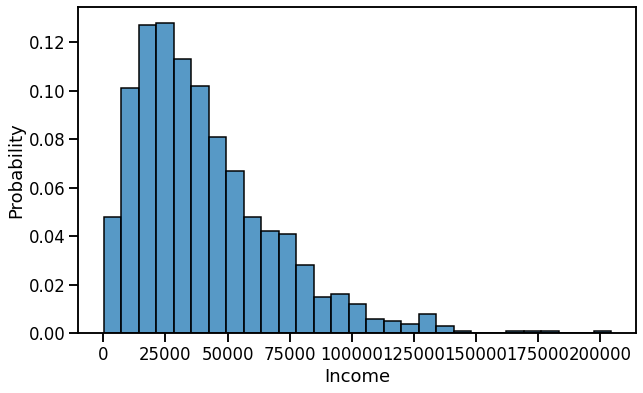

In [10]:
# Obtain histogram of income
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Income'], ax = ax, stat='probability');

In [11]:
# Find the mean
mean = df['Income'].mean()
mean

40653.044949999945

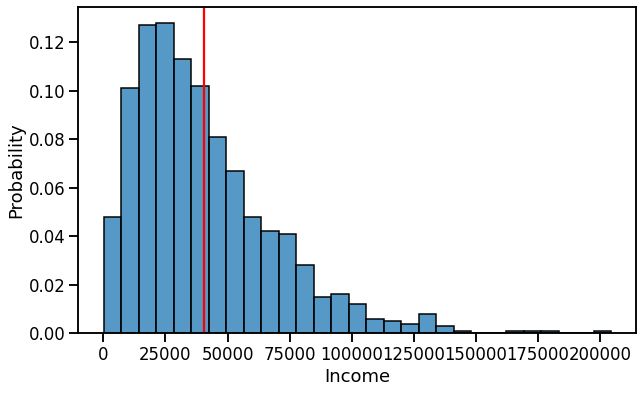

In [12]:
# add in the mean, adjust color for readability...
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Income'], ax = ax, stat='probability')
ax.axvline(mean, color = 'red')

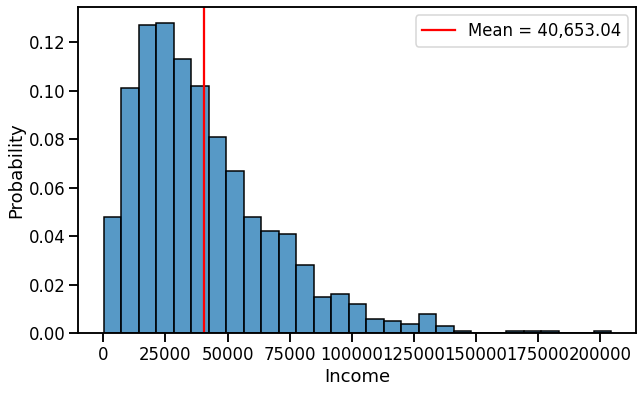

In [13]:
# Add legend (note it shows up in both ax and axvline)
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Income'], ax = ax, stat='probability')
ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
ax.legend();

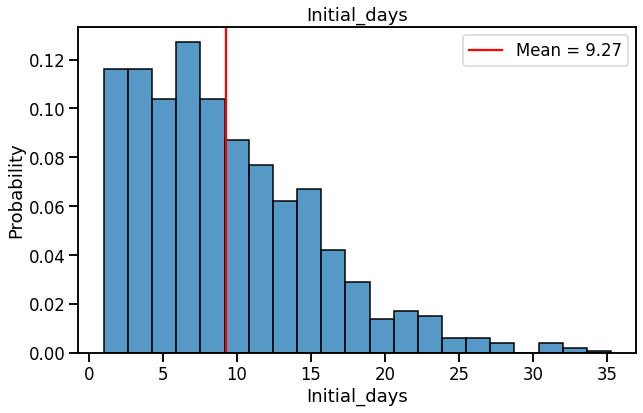

In [14]:
# Can make this more reproducable
col = 'Initial_days'

feature = df[col]
mean = feature.mean()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax = ax, stat='probability')
ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
ax.set_title(f'{col}')
ax.legend();

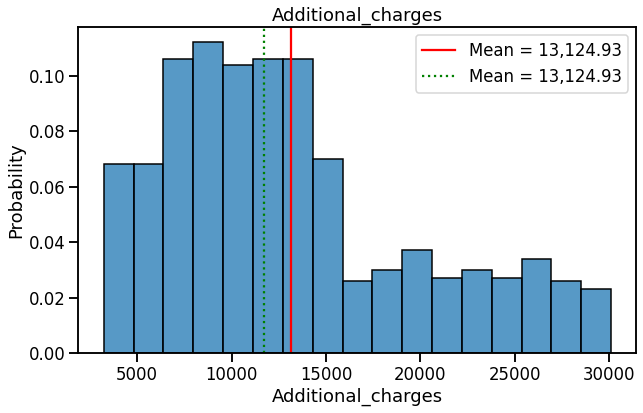

In [15]:
# Now with more lines!
col = 'Additional_charges'

feature = df[col]
mean = feature.mean()
median = feature.median()
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature, ax = ax, stat='probability')
ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
ax.axvline(median, color = 'green', ls = ':', label = f'Mean = {mean:,.2f}')
ax.set_title(f'{col}')
ax.legend();

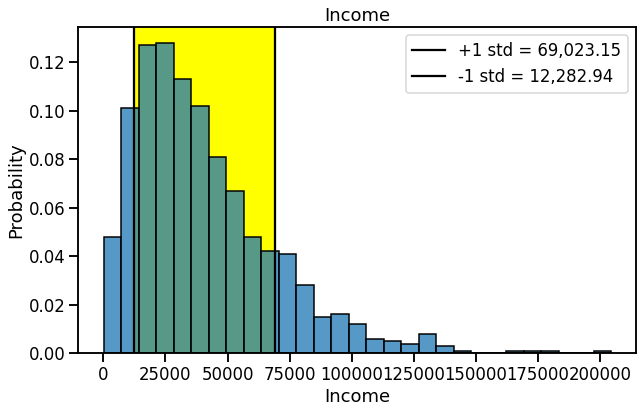

In [16]:
# How do we highlight the standard deviation area??

col = 'Income'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

## Normal Distribution
Symetrical probability distribution with the mean at the center. In a normal distribution the mean, median, and mode will be equal.

a Normal Standard Distribution is a normal distribution converted to Z-Scores.
- 34.1% of the distribution fall between the mean and one standard deviation above OR below the mean. 
    - 68.2% fall between +/- 1 standard deviation.
- 13.6% of the distribution fall between +1 and +2 std and between -1 and -2 std
    - 95.4% fall between +/1 2 std.
- 2.1 % between +2 and +3 std. 
- .1% beyond +3 std.

In [17]:
df = pd.read_csv(height_data)
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [18]:
males = df.loc[df['Gender'] == "Male"].copy()
females = df.loc[df['Gender'] == "Female"].copy()

In [19]:
females['Height'].head()

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
Name: Height, dtype: float64

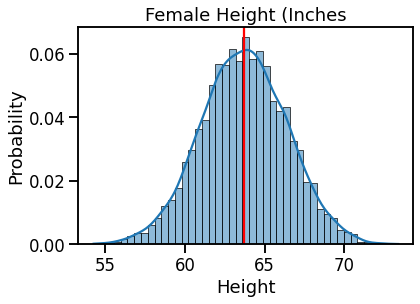

In [20]:
ax = sns.histplot(x=females['Height'], stat='probability', kde = True)
ax.axvline(females['Height'].mean(), color = 'red')
ax.set_title("Female Height (Inches");

In [21]:
# Clean it up and calculate z-score
mean = females['Height'].mean()
std = females['Height'].std()
z_scores_manual = (females['Height'] - mean)/std
z_scores_manual.head()

5000   -1.779502
5001    0.564198
5002   -0.126014
5003    0.286032
5004   -0.710488
Name: Height, dtype: float64

In [22]:
z_scores_scipy = stats.zscore(females['Height'])
z_scores_scipy[:3]

array([-1.77967952,  0.56425475, -0.12602672])

In [23]:
scaler = StandardScaler()
z_scores_scaler = scaler.fit_transform(females[['Height']])
z_scores_scaler[:3]

array([[-1.77967952],
       [ 0.56425475],
       [-0.12602672]])

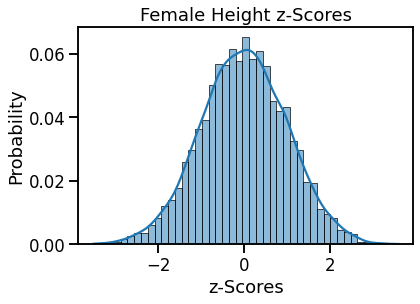

In [24]:
# Plotting the same histplot using z scores
ax = sns.histplot(x=z_scores_manual,stat='probability',kde=True)
ax.set_xlabel("z-Scores")
ax.set_title("Female Height z-Scores");

### PDF and CDF
- Probability Dense Function (PDF)
- Cumulative Distribution Function (CDF)

for an example lets find the probability of a female having a height between 66.0 and 70.0 inches.

In [25]:
# Define our variables
data = females['Height']
low_end = 66.0
high_end = 70.0

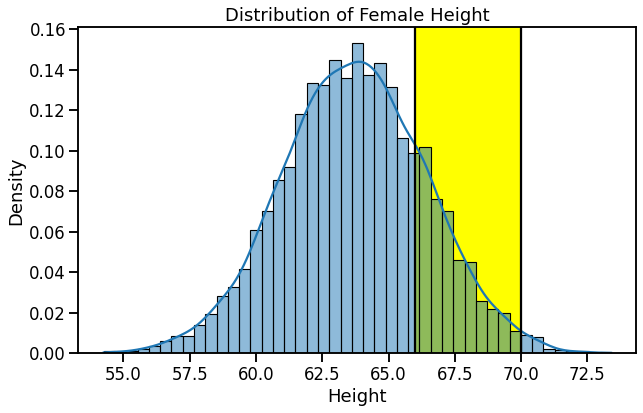

In [26]:
fig,ax = plt.subplots(figsize = (10,6))
sns.histplot(x=data, stat = 'density', kde = True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color = 'black')
ax.axvline(high_end, color = 'black')
ax.axvspan(low_end, high_end, color = 'yellow', zorder = 0);

finding the area under the curve would usually require calculus. instead we will use the cumulative probability distribution..

In [27]:
mean = data.mean()
std = data.std()
min = data.min()
max = data.max()

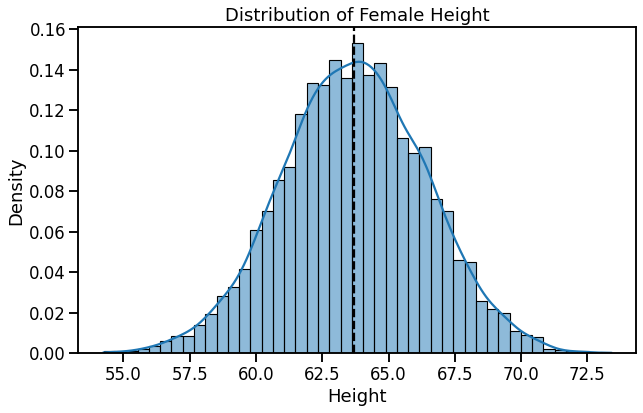

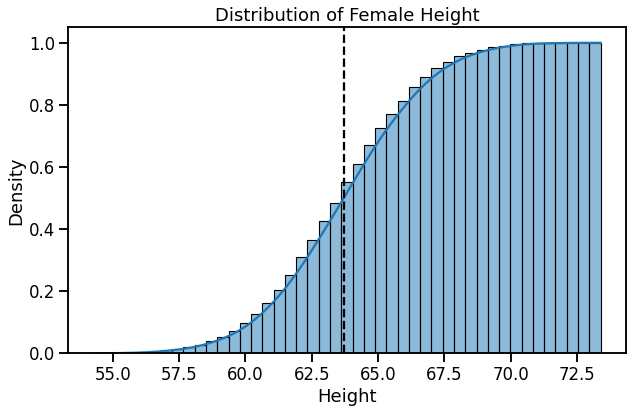

In [28]:
# with cumulative = False (the default!)
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

# vs cumulative = True
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=True)
ax.set_title('Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

CDF is like a running total of percent of the distirbution adding up to 1 (100%) as it increases up the height.

Now we have to normalize the pdf and cdf to do some calculations...
- use stats.norm.pdf which accepts the following params
 - x: range and spacing of x
 -loc: the mean
 -scale: the standard deviation

In [29]:
#set the xrange
x_range = np.linspace(min,max,2000)

In [30]:
pdf = stats.norm.pdf(x_range, loc = mean, scale = std)

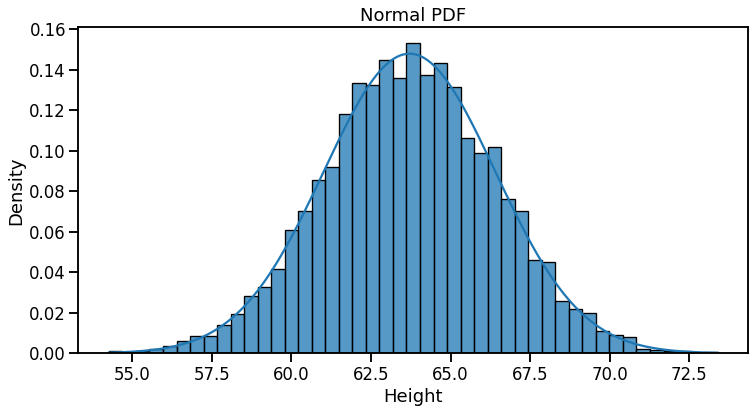

In [31]:
fig, ax = plt.subplots(figsize = (12,6))
sns.histplot(x=data, stat = 'density')
ax.plot(x_range,pdf)
ax.set_title('Normal PDF');

In [32]:
# we can also do the same for cdf... making a normalized cdf for calculations
cdf = stats.norm.cdf(x_range, loc = mean, scale = std)

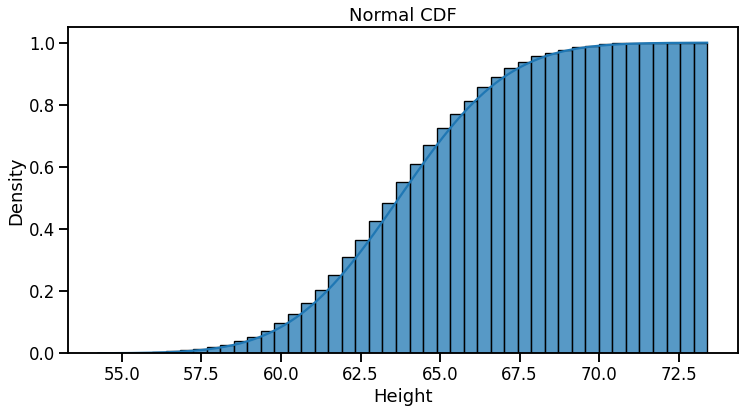

In [33]:
fig, ax = plt.subplots(figsize = (12,6))
sns.histplot(x=data, stat = 'density', cumulative = True)
ax.plot(x_range,cdf)
ax.set_title('Normal CDF');

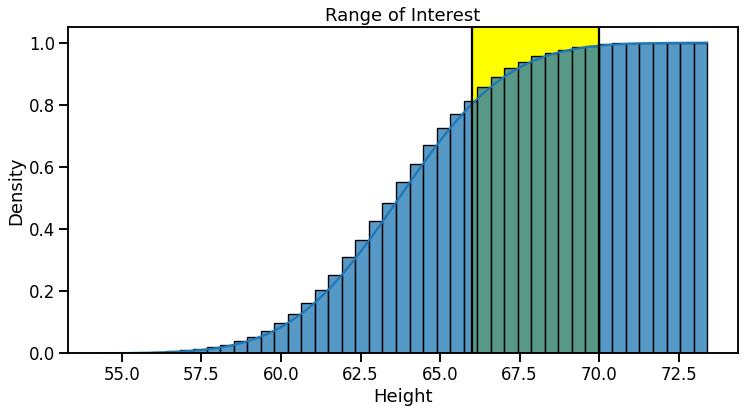

In [34]:
# Now lets mark off the area of interest
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest'); 

In [35]:
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

0.1879096269424746

But what about lesser than or greater than a value???
for example 65 inches?

In [36]:
# Percent below 65 inches
stats.norm.cdf(65, loc=mean,scale=std)

0.6839919457390985

In [37]:
# Percent above 65 inches
1 -stats.norm.cdf(65, loc=mean,scale=std)

0.3160080542609015

# Hypothesis Testing

## Defining Hypothesis
Before perfomring any statistical test we need to establish our possible outcomes of the test. These are known as the Null and Alternate Hypotheses.
- Null Hypotheis ($H_0$) (No Difference) = No statisitcal significance exists... ex: medicine had no effect on xyz. No difference between outcomes of patience who took the medicine and those who took a placebo.
- Alternate Hypothesis ($H_1$) (Difference): The statement or thing we are trying to test. Indicates taht something notable has been found, ie a statistical significance exists. ex the medicine DID have an effect on blood pressure or there IS a difference between patience who took the new medicine and those who took the placebo.

Outcomes: 
- Reject the null hypothesis
- Fail to reject the null hypothesis

## P-Value and Alpha
- Type 1 Error: You erroneously reject the null hypothesis when it is true.
- Type 2 Error: You erroneously fail to reject the null hypothesis when it is NOT true.


### Alpha Level (signficance Value)
- Higher the alpha level the more likely we are to reject the null (increase type 1 error).
- lower the alpha level the less likely we are to reject the null hypothesis (increase type 2 error). 

Alpha is commonly set at .05

The alpha value is the probability that you have erroneously rejected the null hypothesis when it is true.

### P Value (AKA Calculated Probability)
Measure of the probability that an observed difference/value could have occured by random chance. The lower the p-value the greater the statistical signficance.


## Normality Test
We would run a normality test to see if our data is normally distributed

In [38]:
df = pd.read_csv(movie_url,index_col=0,parse_dates=['release_date'])
## Filter out movie population of interest and remove nulls
## keeping only movies released after 2000 and before 2020
df = df[(df['release_date'] > "2000") & (df['release_date'] <"2020")]
df = df.dropna(subset=['runtime'])
df.head(3)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


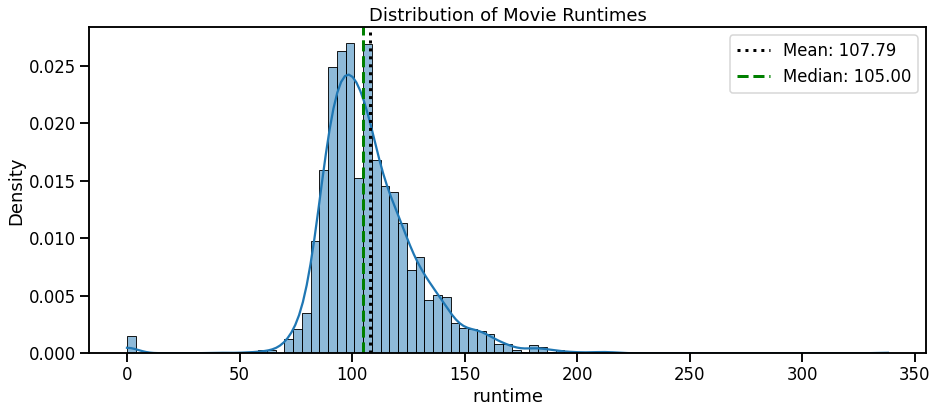

In [39]:
data = df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Distribution of Movie Runtimes')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend()

We can tell from the above graph that the data does not LOOK to be normally distributed based on the difference in mean and median and the tails... but we can check it anyways using stats.normaltest

In [40]:
result = stats.normaltest(data)
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

NormaltestResult(statistic=498.6206359702571, pvalue=5.319914071356255e-109)


True

It is important to note that the null hypothesis of the normal test is that the data IS normal. So a low p-value means our data IS NOT normally distributed.

now lets run it again with the female height data...

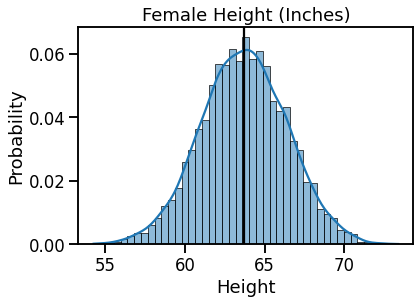

In [41]:
ax = sns.histplot(x=females['Height'],stat='probability',kde=True)
ax.axvline(females['Height'].mean(), color='k')
ax.set_title("Female Height (Inches)");

In [42]:
result = stats.normaltest(females['Height'])
print(result)
# is the p-value less than 0.05?
result.pvalue < .05

NormaltestResult(statistic=0.921020536662115, pvalue=0.6309616036255834)


False

This time the p-value is GREATER than .05 so we fail to reject the null hypothesis... meaning that our data IS normally distributed.

## Sampling
- Population is a collection of ALL the items of interest in a study
- A sample is a randomly selected subset of the population.

Samples are NOT always representative of the popualtion. 
- Increasing the sample size gets a better representation of the population
- taking more samples also gets better representation

## Central Limit Theorem
States that a distribution made of sample means approximates a normal distribution, even if the underlying distribution of the original population is NOT normally distributed. 

This means that if we have a large population (greater than 30) we can assume a normal distribution in our data and use parametric tests EVEN IF our data is NOT normally distributed.

In [43]:
#choose values between 1-1000, choose 5000 values
np.random.seed(42)
uniform = np.random.uniform(1, 1000, 5000)

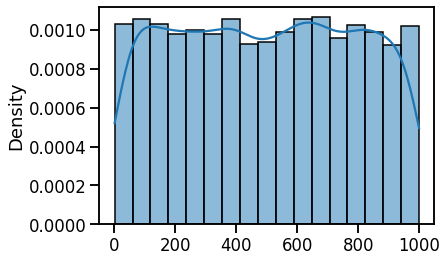

In [44]:
sns.histplot(x=uniform,stat='density', kde=True);

This data is CLEARLY not normal... so lets create a list of sample means

In [45]:
## loop to take 1000 samples of 30 and calculate the means of each sample
np.random.seed(42)
sample_means = []
for i in range(1000):    
  sample = np.random.choice(uniform,size=30,replace=False)    
  sample_means.append( np.mean(sample))
# Print the first 5 sample means
sample_means[0:5]

[369.4808932208104,
 555.6072958462468,
 507.2136853427085,
 449.9927701766231,
 530.2748285204503]

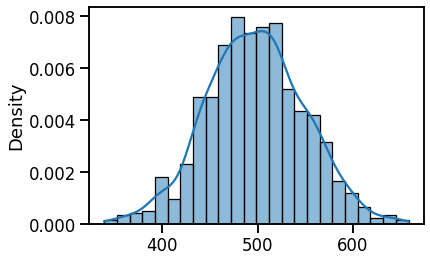

In [46]:
sns.histplot(sample_means,kde=True,stat='density');

In [47]:
stats.normaltest(sample_means)

NormaltestResult(statistic=0.14786790715227197, pvalue=0.9287330313111472)

# Numerical Hypothesis Testing

## T-Distribution
The t-distribution is an alternative to the standard normal distribution used when the  sample size is small (n <30).  As the number of samples increases, the t-distribution becomes more and more similar to the standard normal distribution (z-distribution). 

- The t-distribution is a modified version of the Normal Distribution that was designed to change the shape of its PDF based on the size of the sample (n). 
- The shape of the t-distribution is determined by the value 'degrees of freedom' (df).
    - degrees of freedom is equal to n-1

## T-Tests
- Used to determind when the means of two groups are different (statistically significant, or meaningful vs just random).

Main Types of T-Tests
- Independent (between groups): when different participants are in each group
- Dependent (repeated measures,  'Paired t-test") - Used when the same participants are in both groups.
- One sample t-tests: compare the mean of one group to a well established mean.

The result of a t-test, like most statistical tests, will be a single value. In this case it is called the "t-statistic" or "t-score".  The t-score is a ratio between the difference between two groups and the difference within the groups. 

### Example (Height)


In [48]:
df = pd.read_csv(height_data)
sample = df.sample(n=50,random_state=42)
female_height = sample.loc[ sample['Gender']=='Female',"Height"]
male_height = sample.loc[ sample['Gender']=='Male',"Height"]
## Getting means for gender height
print(f"For Males (n={len(male_height)}): Mean={np.mean(male_height):.2f}")
print(f"For Females (n={len(female_height)}): Mean={np.mean(female_height):.2f}")

For Males (n=27): Mean=68.90
For Females (n=23): Mean=64.13


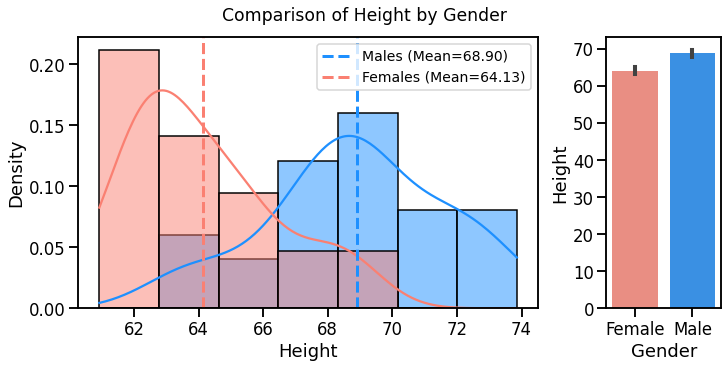

In [49]:
gender_palette={'Male':'dodgerblue', "Female":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='Height',fill=True,hue='Gender',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(male_height), ls='--',lw=3, 
           label=f"Males (Mean={np.mean(male_height):.2f})",color=gender_palette['Male'])

ax.axvline(np.mean(female_height), ls='--', lw=3, 
           label=f"Females (Mean={np.mean(female_height):.2f})",color=gender_palette['Female'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='Gender',y='Height',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of Height by Gender',fontsize='xx-large');

Null Hypothesis: Males and females have the same average height. (There is no statistical significance between the heights of the groups)

Alternative Hypothesis: Males and females have different average height. (There is a statistical significance between the heights of the two groups)

Alpha: We will be using an alpha=.05

Independent T-Test Assumptions:
- No significant outliers
- Normality 
- Equal Variance 

In [50]:
# Check for outliers in the female data
zscores_f = stats.zscore(female_height)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [51]:
# Check for outliers in the male data
zscores_m = stats.zscore(male_height)
outliers_m = abs(zscores_m)>3
np.sum(outliers_m)

0

In [52]:
# normal test males
result_m = stats.normaltest(male_height)
result_m

NormaltestResult(statistic=0.33615904712566513, pvalue=0.8452866118088072)

In [53]:
# normal test females
result_f = stats.normaltest(female_height)
result_f

NormaltestResult(statistic=2.8307141616584417, pvalue=0.2428388848547339)

In [54]:
# Test for equal variance using Levene's Test
result = stats.levene(female_height, male_height)
result

LeveneResult(statistic=0.4550154927872889, pvalue=0.5031988559709122)

 All three assumptions for a independent T-Test have been met


In [55]:
## Final t-test, after confirming we meet the assumptions
result = stats.ttest_ind(female_height,male_height)
result

Ttest_indResult(statistic=-6.700593917991493, pvalue=2.1170736038110527e-08)

In [56]:
## is our result significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000212
Significant: True


Our P-value is less than .05 so we reject the null hypothesis and accept the alternative.

## ANOVA Test
T-Tests can only be used when comparing two groups... but what about when we have more than two groups??? ANOVA

Analysis of Variance tests the variance between all groups and determines if there is a significant difference. AFTER running your ANOVA you will have to run a post-hoc pairwise test to see WHERE the difference occurs.
- ANOVA results in the f-score or f-statistic and a p-value

One Way ANOVA Assumptions
- Normality
- Equal Variance
- No Significant Outliers

### Example (Diets)
- Question: Do different diets result in different amounts of weight loss?

 - $H_0$ :  Different diets all have the same results. (the kg_lost is not significantly different between diets)
 - $H_1$ : Different diets have different results. (the kg_lost is significantly different between diets)
 - Alpha=.05

In [57]:
df = pd.read_csv(diets_url)
df.head()

,gender,Age,Height,pre.weight,Diet,weight6weeks,kg_lost
0,0,22,159,58,1,54.2,3.8
1,0,46,192,60,1,54.0,6.0
2,0,55,170,64,1,63.3,0.7
3,0,33,171,64,1,61.1,2.9
4,0,50,170,65,1,62.2,2.8


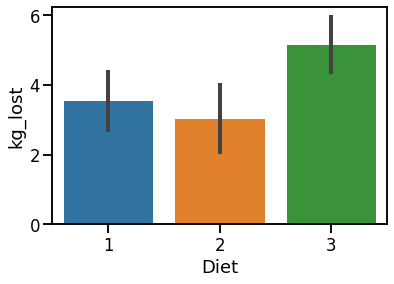

In [58]:
sns.barplot(data=df, x='Diet',y='kg_lost');

For convenience we separate our groups out into a dictionary. 

In [59]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups

groups = {}
for i in df['Diet'].unique():
    # Get series for group and rename
    data = df.loc[df['Diet'] ==i, 'kg_lost'].copy()

    #Save into the dictionary
    groups[i] = data
groups.keys()

dict_keys([1, 2, 3])

In [60]:
# Test Normality
norm_results = {}
for i, data in groups.items():
    stat,p = stats.normaltest(data)
    # Save p value, test stat, and size of group
    norm_results[i] = {'n':len(data),
                       'p':p,
                       'test stat': stat}

# convert to a df
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
1,26.0,0.216027,3.064706
2,27.0,0.841993,0.343967
3,27.0,0.463144,1.539436


In [61]:
# Make a column to check the significance 
norm_results_df['sig'] = norm_results_df['p'] < .05
norm_results_df

,n,p,test stat,sig
1,26.0,0.216027,3.064706,False
2,27.0,0.841993,0.343967,False
3,27.0,0.463144,1.539436,False


Looks like we have normal distributions for all three diets

In [62]:
# Testing for Equal Variance

## Special Note: the * operator unpacks values in an interable list (see example below)

# stats.levene(groups[1], groups[2], groups[3]) # Without *
# OR with the * operator
stats.levene(*groups.values())

LeveneResult(statistic=0.30650755802082735, pvalue=0.7369067613743494)

we have met the assumption of equal variance

In [63]:
# Run the One Way ANOVA test
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=5.679765022955312, pvalue=0.005001924377430895)

We have a significant result! But WHICH diets are different?
- Tukey Pairwise Comparison adjusts the p-values to decrease the likelihood of a Type 1 error when comparing multiple categories.

In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

values = df['kg_lost']
labels = df['Diet']

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [65]:
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.5125,0.7026,-2.0964,1.0713,False
1,3,1.6097,0.0455,0.0258,3.1935,True
2,3,2.1222,0.0051,0.5534,3.6911,True


Significant difference between 1 and 3, and 2 and 3. Not a significant difference between 1 and 2. 

# Categorical Hypothesis Testing